**Global Sales Analysis**





In [1]:
import pandas as pd

In [6]:
df = pd.read_excel('Financial Sample.xlsx')
print(df.head())
print(df.shape)

      Segment  Country    Product Discount Band  Units Sold  \
0  Government   Canada  Carretera           NaN      1618.5   
1  Government  Germany  Carretera           NaN      1321.0   
2   Midmarket   France  Carretera           NaN      2178.0   
3   Midmarket  Germany  Carretera           NaN       888.0   
4   Midmarket   Mexico  Carretera           NaN      2470.0   

   Manufacturing Price  Sale Price  Gross Sales  Discounts    Sales     COGS  \
0                    3          20      32370.0        0.0  32370.0  16185.0   
1                    3          20      26420.0        0.0  26420.0  13210.0   
2                    3          15      32670.0        0.0  32670.0  21780.0   
3                    3          15      13320.0        0.0  13320.0   8880.0   
4                    3          15      37050.0        0.0  37050.0  24700.0   

    Profit       Date  Month Number Month Name  Year  
0  16185.0 2014-01-01             1    January  2014  
1  13210.0 2014-01-01         

Which segment generated the highest total profit?

In [5]:
segment_profit = df.groupby('Segment')['Profit'].sum()
highest_profit_segment = segment_profit.idxmax()
print(f"The segment with the highest total profit is: {highest_profit_segment}")

The segment with the highest total profit is: Government


In [10]:
# Correct the column name
df = df.rename(columns={' Sales': 'Sales'})

# Create new features
df['Profit Margin'] = df['Profit'] / df['Sales']
df['Discount Percentage'] = df['Discounts'] / df['Gross Sales']
df['Cost-to-Sales Ratio'] = df['COGS'] / df['Sales']

# Fill potential NaN values resulting from division by zero with 0
df.fillna(0, inplace=True)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Sales Trend Over Months

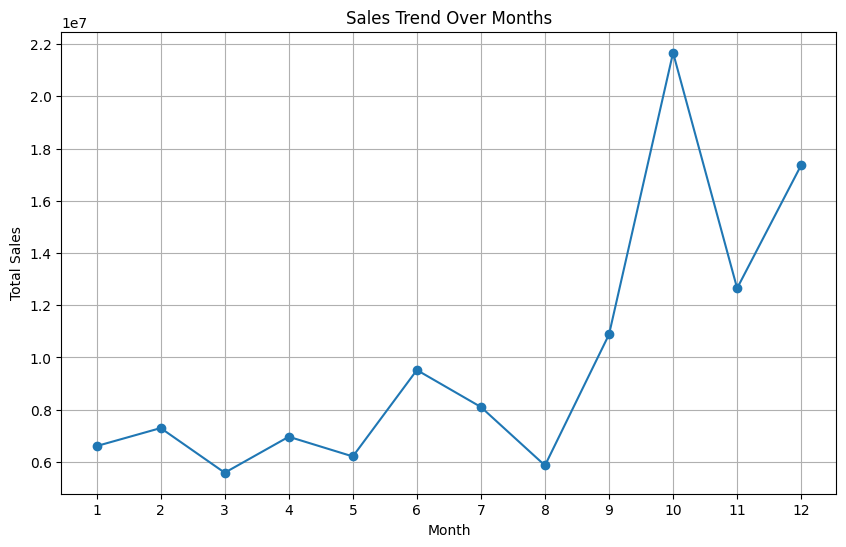

In [11]:
import matplotlib.pyplot as plt

# Assuming 'Date' column is already converted to datetime
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Months')
plt.xticks(monthly_sales.index)  # Show all month numbers
plt.grid(True)
plt.show()

Country with Highest Units Sold


In [12]:
country_units_sold = df.groupby('Country')['Units Sold'].sum()
highest_units_sold_country = country_units_sold.idxmax()
print(f"The country that sold the most units overall is: {highest_units_sold_country}")


The country that sold the most units overall is: Canada


 Sales Comparison Across Products



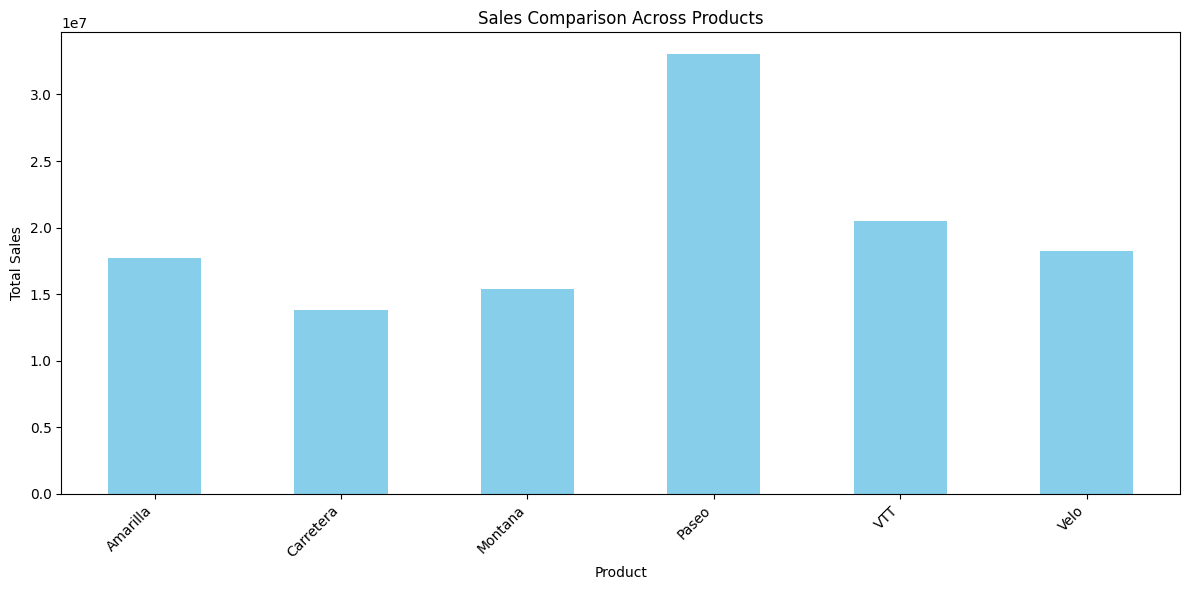

In [13]:

import matplotlib.pyplot as plt

product_sales = df.groupby('Product')['Sales'].sum()

plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Sales Comparison Across Products')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Distribution of Discounts

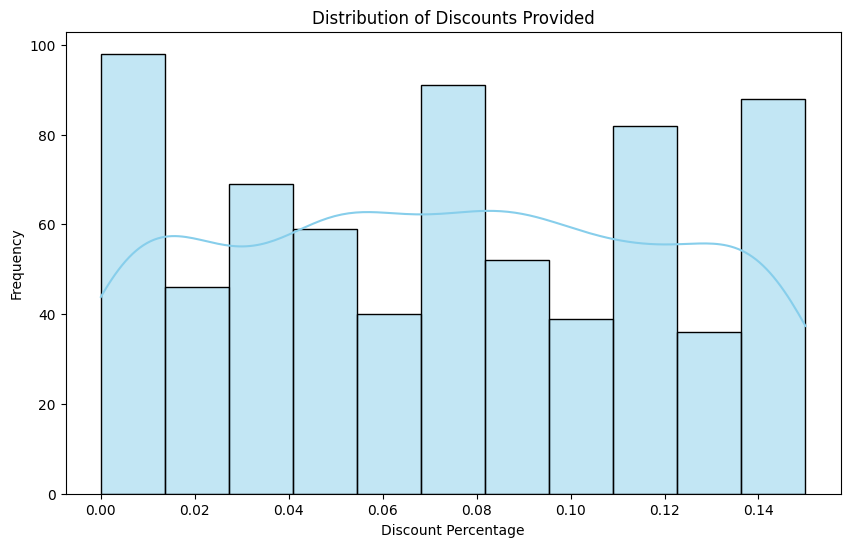

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Discount Percentage'], kde=True, color='skyblue')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Discounts Provided')
plt.show()